In [1]:
import numpy as np   
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

import os
from inspect import cleandoc
import timeit
from experiments.benchmark_utils import do_projection_benchmarks, do_selection_benchmarks, do_join_benchmarks, do_one_hot_encoder_benchmarks, do_standard_scaler_benchmarks, do_decision_tree_benchmarks
import matplotlib
import statistics

from mlinspect.utils import get_project_root

Defined plot_runtimes, example output:


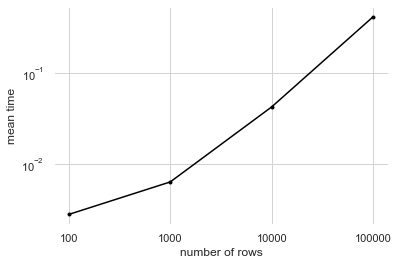

In [2]:
def plot_runtimes(run_row_numbers, time_per_run, title_and_path, save_to_file=False):
    # Data for plotting
    np_times = np.array(time_per_run)
    np_row_numbers = np.array(run_row_numbers)

    # Note that using plt.subplots below is equivalent to using
    # fig = plt.figure() and then ax = fig.add_subplot(111)
    fig, ax = plt.subplots()
    
    ax.set_yscale('log') # TODO: Decide how to plot this
    ax.plot(np_times, marker='o', color='black', markersize=3)
    
    ax.set_xticks(range(0,len(run_row_numbers)))
    ax.set_xticklabels(run_row_numbers)
    
    ax.set_facecolor('white')
    
    #major_ticks = np.arange(0, 10, 3)
    #ax.set_yticks(major_ticks)
    
    # ax.set_ylim([0,10])
    ax.set(xlabel='number of rows', ylabel='mean time')
    ax.grid(True, color='lightgrey')
    if save_to_file:
        fig.savefig(title_and_path + '.svg', bbox_inches='tight')
        fig.savefig(title_and_path + '.png', bbox_inches='tight', dpi=800)
    
    plt.show()
    plt.close()
    
test_row_numbers = [100, 1000, 10000, 100000]
test_plot_runtimes = [0.0028039772499999227, 0.006364328399999941, 0.04229586309999993, 0.4114196768999999]

print('Defined plot_runtimes, example output:')
plot_runtimes(test_row_numbers, test_plot_runtimes, 'test_plot_runtimes')

Defined plot_runtimes_all, example output:


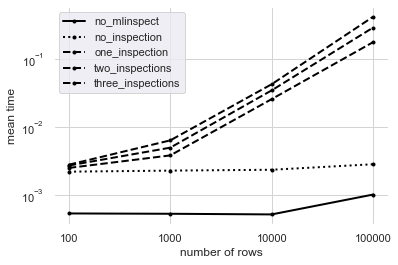

In [3]:
def plot_runtimes_all(run_row_numbers, benchmark_results, linestyles, title_and_path, save_to_file=False):
    # Note that using plt.subplots below is equivalent to using
    # fig = plt.figure() and then ax = fig.add_subplot(111)
    fig, ax = plt.subplots()
    ax.set_yscale('log') # TODO: Decide how to plot this
    
    #ax.plot(losses_orig, marker='o', color='black', linewidth=2, linestyle='dashed', label="orig")
    for label, results in benchmark_results.items():
        # Data for plotting
        np_times = np.array(results)
        if label in linestyles:
            linestyle = linestyles[label]
            ax.plot(np_times, marker='o', color='black', linewidth=2, linestyle=linestyle, label=label, markersize=3)
    
    ax.set_xticks(range(0,len(run_row_numbers)))
    ax.set_xticklabels(run_row_numbers)
    
    ax.set_facecolor('white')
    
    # major_ticks = np.arange(0, 10, 3)
    # ax.set_yticks(major_ticks)
    
    # ax.set_ylim([0,10])
    ax.set(xlabel='number of rows', ylabel='mean time')
    ax.grid(True, color='lightgrey')
    
    plt.legend()
    
    if save_to_file:
        fig.savefig(title_and_path + '.svg', bbox_inches='tight')
        fig.savefig(title_and_path + '.png', bbox_inches='tight', dpi=800)
    
    plt.show()
    plt.close()

test_row_numbers = [100, 1000, 10000, 100000]
test_benchmark_results = {\
    "no_mlinspect": [0.0005420450000000798, 0.0005361602000002463, 0.0005246571999999005, 0.0010252619999999268],
    "no_inspection": [0.0022168788499999257, 0.0022983642499999402, 0.0023646199999999506, 0.0028484614500001726],
    "one_inspection": [0.002515717000000084, 0.0038362508500000116, 0.025606818549999976, 0.17484780609999992],
    "two_inspections": [0.002726666, 0.004980573499999963, 0.03439934060000005, 0.28592700379999964],
    "three_inspections": [0.0028039772499999227, 0.006364328399999941, 0.04229586309999993, 0.4114196768999999]
}

print('Defined plot_runtimes_all, example output:')
linestyles = {"no_mlinspect": "solid", 
             "no_inspection": "dotted", 
             "one_inspection": "dashed", 
             "two_inspections": "dashed", 
             "three_inspections": "dashed"}
plot_runtimes_all(test_row_numbers, test_benchmark_results, linestyles, 'test_plot_runtimes_all')

In [4]:
row_numbers = [100, 1000, 10000, 100000] #, 1000000]

projection_mean_benchmark_results = {}

for row_number in row_numbers:
    benchmark_results = do_projection_benchmarks(row_number)
    for label, results in benchmark_results.items():
        current_list = projection_mean_benchmark_results.get(label, [])
        current_list.append(statistics.mean(results))
        projection_mean_benchmark_results[label] = current_list
    
    print("Done: {}".format(row_number))

for label, results in projection_mean_benchmark_results.items():
    print("{}: {}".format(label, results))

Done: 100
Done: 1000
Done: 10000
Done: 100000
no mlinspect: [0.000577738999999955, 0.0005128500000001424, 0.0005987236000001061, 0.0008030125999999527]
no inspection: [0.0028852995999999465, 0.0022052956000001346, 0.0023831730000001272, 0.0024487970000000915]
one inspection: [0.0026794727999996937, 0.0037132618000001115, 0.0187582098, 0.1720021854000004]
two inspections: [0.0025484829999998125, 0.005127740600000053, 0.029774503199999813, 0.2797953453999996]
three inspections: [0.0027077816000000256, 0.0077365268000001205, 0.04063814160000021, 0.39446753560000014]


Projection results


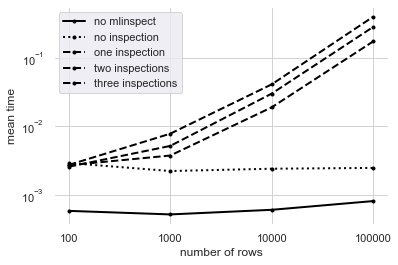

In [5]:
print('Projection results')

projection_linestyles = {"no mlinspect": "solid", 
             "no inspection": "dotted", 
             "one inspection": "dashed", 
             "two inspections": "dashed", 
             "three inspections": "dashed"}

plot_runtimes_all(row_numbers, projection_mean_benchmark_results, projection_linestyles, 'all_runtimes_projection')

In [6]:
row_numbers = [100, 1000, 10000, 100000] #, 1000000]

selection_mean_benchmark_results = {}

for row_number in row_numbers:
    benchmark_results = do_selection_benchmarks(row_number)
    for label, results in benchmark_results.items():
        current_list = selection_mean_benchmark_results.get(label, [])
        current_list.append(statistics.mean(results))
        selection_mean_benchmark_results[label] = current_list
    
    print("Done: {}".format(row_number))

for label, results in selection_mean_benchmark_results.items():
    print("{}: {}".format(label, results))

Done: 100
Done: 1000
Done: 10000
Done: 100000
no mlinspect: [0.00042174239999930306, 0.00044558300000048235, 0.0004994469999999751, 0.0018054835999997466]
no inspection: [0.005904000600000003, 0.004812643599999333, 0.005830383800000405, 0.01672887079999974]
one inspection: [0.007800495399999363, 0.010022535199999894, 0.0371486038000004, 0.2929491236]
two inspections: [0.008408043200000038, 0.01198662679999991, 0.052716653200000255, 0.4645499404000006]
three inspections: [0.008438624599999755, 0.014278514600000135, 0.0695952018000007, 0.6121377396000007]


Selection results


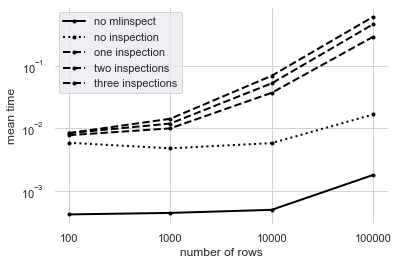

In [7]:
print('Selection results')

plot_runtimes_all(row_numbers, selection_mean_benchmark_results, projection_linestyles, 'all_runtimes_selection')

In [8]:
row_numbers = [100, 1000, 10000, 100000] #, 1000000]

join_mean_benchmark_results = {}

for row_number in row_numbers:
    benchmark_results = do_join_benchmarks(row_number)
    for label, results in benchmark_results.items():
        current_list = join_mean_benchmark_results.get(label, [])
        current_list.append(statistics.mean(results))
        join_mean_benchmark_results[label] = current_list
    
    print("Done: {}".format(row_number))

for label, results in join_mean_benchmark_results.items():
    print("{}: {}".format(label, results))

Done: 100
Done: 1000
Done: 10000
Done: 100000
no mlinspect: [0.002856805200000423, 0.0017064107999992472, 0.0035571422000010957, 0.021680864600000405]
no inspection: [0.010639548200000348, 0.006145410200000612, 0.010423394200000758, 0.05891170459999913]
one inspection: [0.014124538799999442, 0.019218270199999665, 0.07082916020000027, 0.4250668997999988]
two inspections: [0.012784363000000099, 0.024590558000000585, 0.0767175064, 0.6345309538000009]
three inspections: [0.012848236800000735, 0.026302950800000245, 0.08471709079999883, 0.762291834200002]


Join results


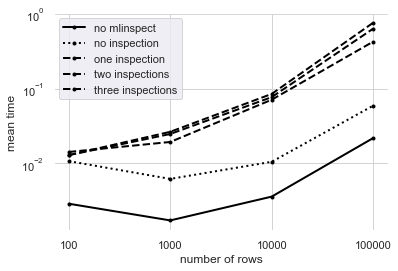

In [9]:
print('Join results')

plot_runtimes_all(row_numbers, join_mean_benchmark_results, projection_linestyles, 'all_runtimes_join')

In [10]:
row_numbers = [100, 1000, 10000, 100000] #, 1000000]

one_hot_mean_benchmark_results = {}

for row_number in row_numbers:
    benchmark_results = do_one_hot_encoder_benchmarks(row_number)
    for label, results in benchmark_results.items():
        current_list = one_hot_mean_benchmark_results.get(label, [])
        current_list.append(statistics.mean(results))
        one_hot_mean_benchmark_results[label] = current_list
    
    print("Done: {}".format(row_number))

for label, results in one_hot_mean_benchmark_results.items():
    print("{}: {}".format(label, results))

Done: 100
Done: 1000
Done: 10000
Done: 100000
no mlinspect: [0.00047089460000080405, 0.000699519599999121, 0.0035239255999997, 0.024684658000001036]
no inspection: [0.002291213399999492, 0.002319857599999864, 0.007072340599998483, 0.01865283400000095]
one inspection: [0.002259291199999325, 0.0038408330000009984, 0.02151395379999883, 0.1779432381999996]
two inspections: [0.0023835205999986897, 0.005195479400001091, 0.028887258600001076, 0.27140238559999974]
three inspections: [0.0025345266000002197, 0.007691585400000633, 0.040401314600002534, 0.39734871459999965]


OneHotEncoder results


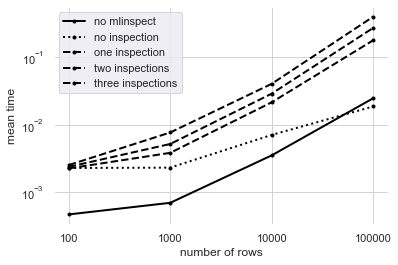

In [11]:
print('OneHotEncoder results')

plot_runtimes_all(row_numbers, one_hot_mean_benchmark_results, projection_linestyles, 'all_runtimes_one_hot')

In [12]:
row_numbers = [100, 1000, 10000, 100000] #, 1000000]

scaler_mean_benchmark_results = {}

for row_number in row_numbers:
    benchmark_results = do_standard_scaler_benchmarks(row_number)
    for label, results in benchmark_results.items():
        current_list = scaler_mean_benchmark_results.get(label, [])
        current_list.append(statistics.mean(results))
        scaler_mean_benchmark_results[label] = current_list
    
    print("Done: {}".format(row_number))

for label, results in scaler_mean_benchmark_results.items():
    print("{}: {}".format(label, results))

Done: 100
Done: 1000
Done: 10000
Done: 100000
no mlinspect: [0.0028631988000014986, 0.002561571400001128, 0.0024447520000009603, 0.0029238792000001014]
no inspection: [0.004763535800000796, 0.003960317199998542, 0.003723016200000018, 0.004220618799999442]
one inspection: [0.004142793199999062, 0.005642826399997603, 0.018905409199999213, 0.1646948960000003]
two inspections: [0.004357506199998795, 0.006769135800000469, 0.028679060200002483, 0.26153167459999904]
three inspections: [0.005050220800001171, 0.007936269799999706, 0.0382307756000003, 0.3514753855999956]


StandardScaler results


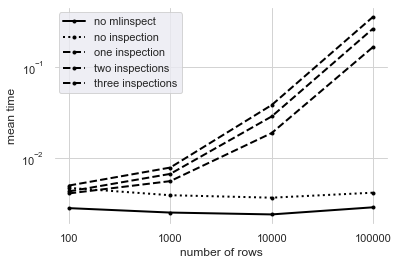

In [13]:
print('StandardScaler results')

plot_runtimes_all(row_numbers, scaler_mean_benchmark_results, projection_linestyles, 'all_runtimes_scaler')

In [14]:
row_numbers = [100, 1000, 10000, 100000] #, 1000000]

tree_mean_benchmark_results = {}

for row_number in row_numbers:
    benchmark_results = do_decision_tree_benchmarks(row_number)
    for label, results in benchmark_results.items():
        current_list = tree_mean_benchmark_results.get(label, [])
        current_list.append(statistics.mean(results))
        tree_mean_benchmark_results[label] = current_list
    
    print("Done: {}".format(row_number))

for label, results in tree_mean_benchmark_results.items():
    print("{}: {}".format(label, results))

Done: 100
Done: 1000
Done: 10000
Done: 100000
no mlinspect: [0.003759794199996236, 0.011475052800000185, 0.06398614200000168, 0.6498670197999985]
no inspection: [0.005678499200001852, 0.012357186599999181, 0.06495493559999943, 0.6583982950000007]
one inspection: [0.010440811400002303, 0.022817570799998067, 0.15238946699999759, 1.379610561000004]
two inspections: [0.0108190215999997, 0.023865007599997056, 0.16107497579999402, 1.6867991211999935]
three inspections: [0.00940188759999785, 0.02460363499999687, 0.17101258599999766, 1.7968853897999992]


DecisionTree results


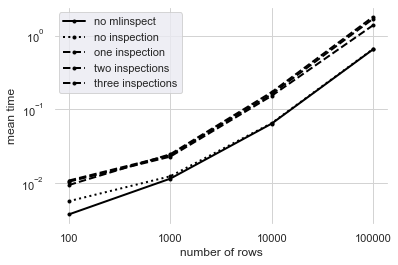

In [15]:
print('DecisionTree results')

plot_runtimes_all(row_numbers, tree_mean_benchmark_results, projection_linestyles, 'all_runtimes_tree')